## Exploratory data analysis

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
df = pd.read_csv('../data/1-raw/openpowerlifting-2025-09-27-IPF-clean.csv')
# df = pd.read_csv('../data/2-preprocessed/openpowerlifting-IPF-clean.csv')

/var/folders/wm/mz0f2pm95tn34tffq_n21nv80000gn/T/ipykernel_56803/378888381.py:1: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/1-raw/openpowerlifting-2025-09-27-IPF-clean.csv')


In [27]:
df.shape[:]
# null = df.query('BodyweightKg != BodyweightKg')
# print(null)

print(len(df[df['BodyweightKg'].isnull()]))
print(len(df[df['Age'].isna()]))

780
70222


In [30]:
# df['Division'].value_counts()
df['Sex'].value_counts()

Sex
M    259357
F    128032
Name: count, dtype: int64

In [31]:
df.describe()

,Age,BodyweightKg,Squat1Kg,Squat2Kg,Squat3Kg,Squat4Kg,Best3SquatKg,Bench1Kg,Bench2Kg,Bench3Kg,...,Deadlift1Kg,Deadlift2Kg,Deadlift3Kg,Deadlift4Kg,Best3DeadliftKg,TotalKg,Dots,Wilks,Glossbrenner,Goodlift
count,317167.000000,386609.000000,289335.000000,287556.000000,283078.000000,8.000000,380924.000000,288795.000000,287193.000000,282166.000000,...,288101.000000,285097.000000,279276.000000,6.000000,379826.000000,373873.000000,373640.000000,373640.000000,373640.000000,373549.000000
mean,27.924984,81.917899,124.844063,115.849915,55.402702,-52.500000,167.594701,85.631308,66.631112,-3.183901,...,164.532276,145.433129,33.945273,13.333333,194.546762,470.641307,352.118486,350.210017,327.878683,71.783157
std,10.794107,20.577395,110.220355,132.719453,173.899127,183.542716,58.452350,66.731257,93.546611,118.542541,...,95.363658,140.821766,207.854364,224.085177,59.392725,152.797298,67.520604,67.241321,66.782414,13.811572
min,5.500000,22.680000,-442.500000,-477.500000,-500.000000,-255.000000,-330.000000,-280.000000,-575.000000,-575.000000,...,-500.000000,-502.500000,-550.000000,-267.500000,-400.000000,59.000000,37.760000,37.290000,35.660000,7.760000
25%,20.500000,66.540000,100.000000,100.000000,-130.000000,-206.000000,122.500000,60.000000,50.000000,-112.500000,...,130.000000,127.500000,-192.500000,-151.875000,147.500000,342.500000,308.567500,306.760000,283.680000,62.930000
50%,24.500000,80.810000,147.500000,150.000000,127.500000,-97.500000,167.500000,95.000000,92.500000,-47.500000,...,180.000000,180.000000,135.000000,16.250000,200.000000,476.300000,353.960000,351.840000,329.780000,72.190000
75%,32.000000,92.500000,190.000000,200.000000,192.500000,100.000000,210.000000,127.500000,130.000000,112.500000,...,220.000000,230.000000,210.000000,208.750000,240.000000,585.000000,397.180000,394.920000,373.520000,81.010000
max,93.500000,260.000000,450.000000,470.000000,490.000000,253.000000,490.000000,310.000000,317.500000,322.500000,...,385.000000,411.000000,410.500000,250.000000,417.500000,1152.500000,655.790000,654.120000,588.960000,133.370000


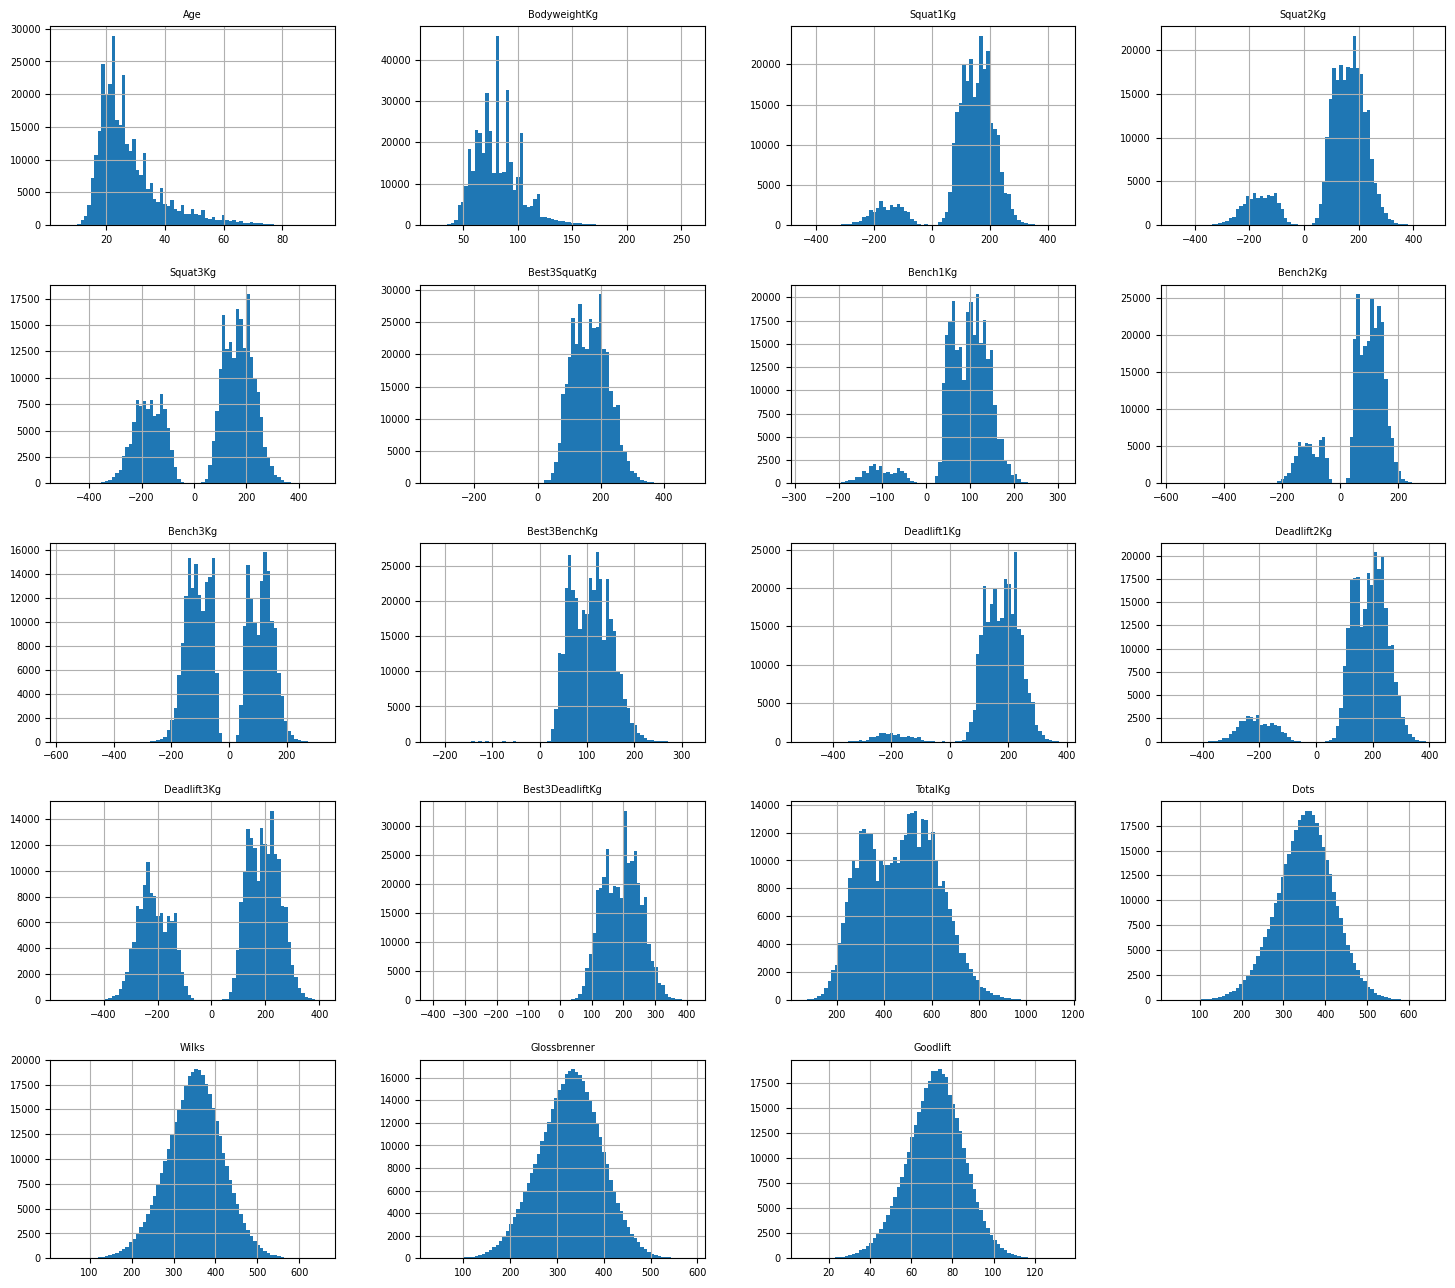

In [32]:
plt.rc('font', size=7)
plt.rc('axes', labelsize=7, titlesize=7)
plt.rc('xtick', labelsize=7)
plt.rc('ytick', labelsize=7)
df_modified = df[[column for column in df.columns if '4Kg' not in column]] # filter out record attempts
df_modified.hist(bins=75, figsize=(18, 16))
plt.show()


x = value, y = count <br>
NEGATIVE VALUES IN LIFTS INDICATE FAILED ATTEMPTS

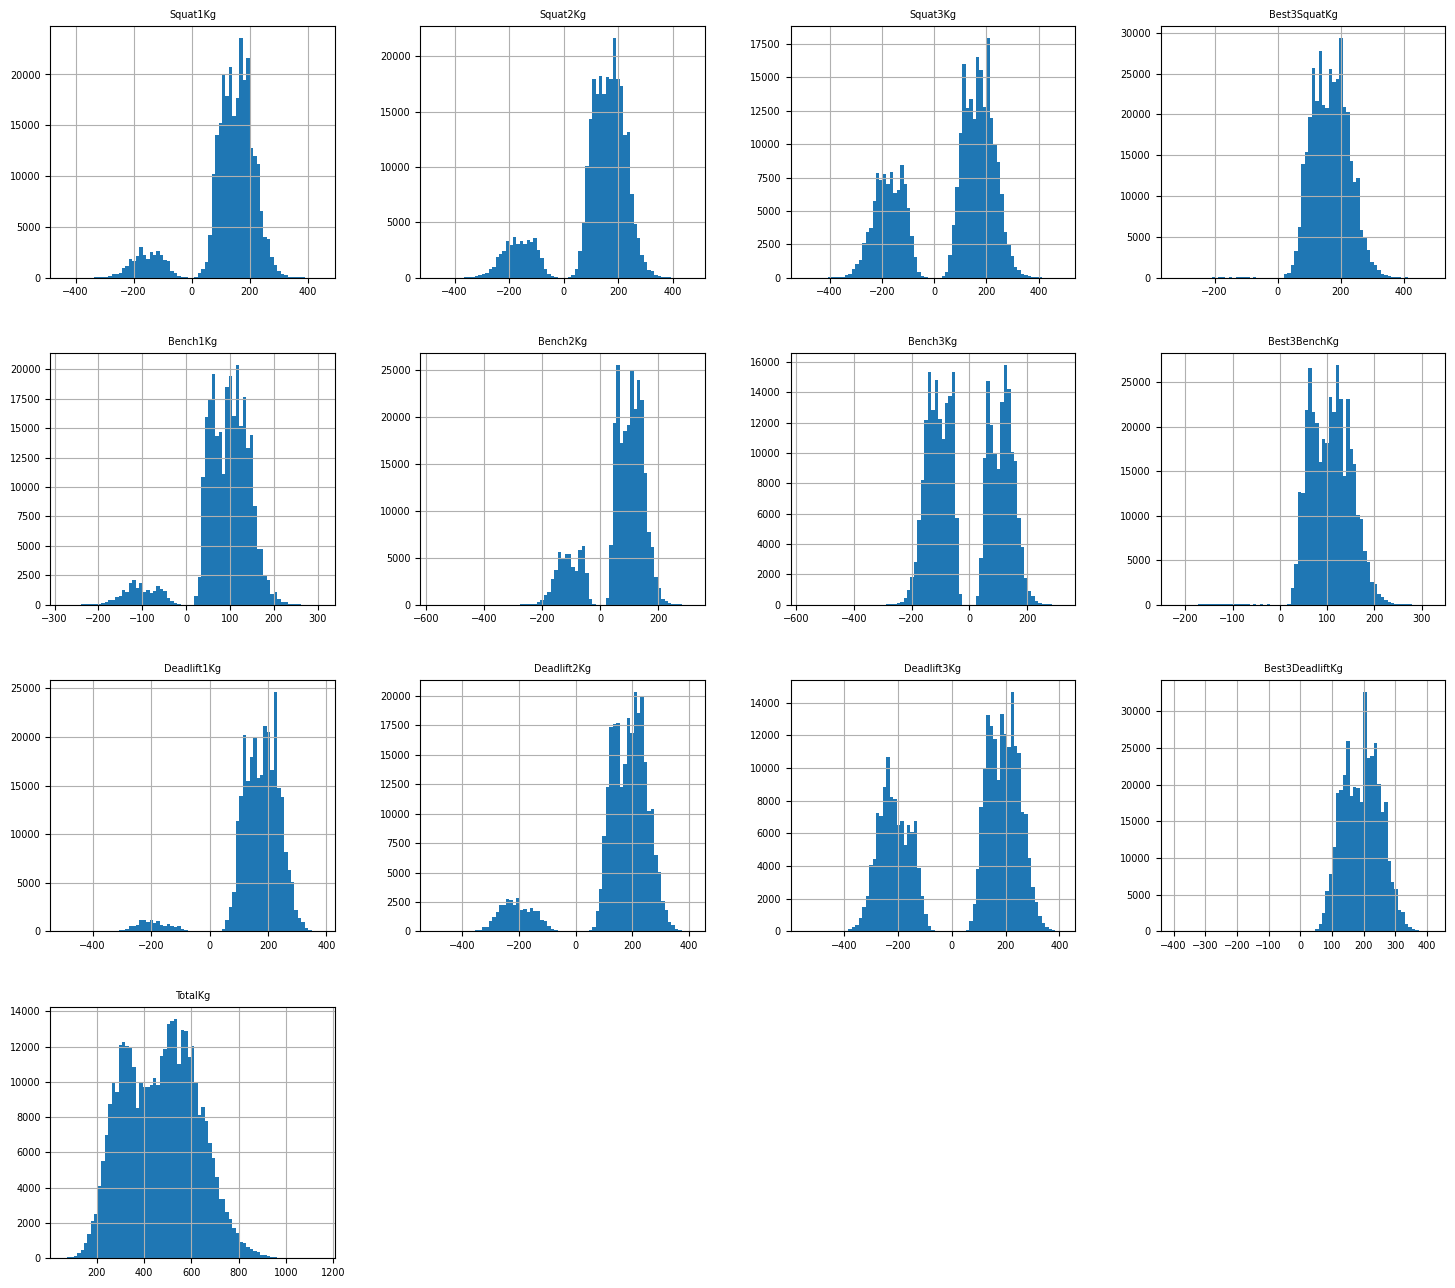

In [33]:
plt.rc('font', size=7)
plt.rc('axes', labelsize=7, titlesize=7)
plt.rc('xtick', labelsize=7)
plt.rc('ytick', labelsize=7)
df_lifts = df[[column for column in df.columns if 'Kg' in column and 'Bodyweight' not in column and '4Kg' not in column]]
df_lifts.hist(bins=75, figsize=(18, 16))
plt.show()

Bimodal distribution on lift attempts, negatives = fail, positives = success <br>
More fails on 3rd attempts = riskier weight choice -> higher fatigue OR attempt to climb ranks/leaderboard <br>
More fails on Bench 3rd attempt = lifters could overestimate their bench strength

In [48]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date').reset_index(drop=True)

split_date = df['Date'].quantile(0.8)
train_df = df[df['Date'] < split_date]
test_df = df[df['Date'] >= split_date]

print(f"Train set from: {train_df['Date'].min()} to: {train_df['Date'].max()}")
print(f"Test set from: {test_df['Date'].min()} to: {test_df['Date'].max()}")

train_set = train_df.copy()

Train set from: 1966-02-27 00:00:00 to: 2023-11-14 00:00:00
Test set from: 2023-11-17 00:00:00 to: 2025-09-21 00:00:00


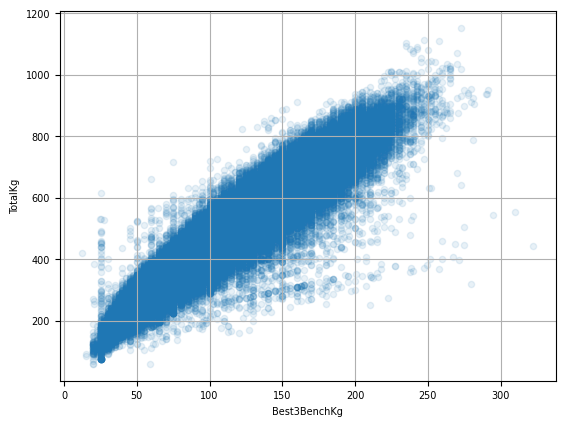

In [53]:
train_set.plot(kind='scatter', x='Best3BenchKg', y='TotalKg', grid=True, alpha=0.1)
plt.show()

In [55]:
correlation = df.corr(numeric_only=True)
correlation['TotalKg'].sort_values(ascending=False)

TotalKg            1.000000
Best3SquatKg       0.978567
Best3DeadliftKg    0.975088
Best3BenchKg       0.952271
Glossbrenner       0.813726
Dots               0.740278
Goodlift           0.734245
Wilks              0.728354
BodyweightKg       0.669353
Deadlift1Kg        0.540425
Bench1Kg           0.533153
Squat1Kg           0.439295
Squat2Kg           0.348154
Bench2Kg           0.315570
Deadlift2Kg        0.277932
Squat3Kg           0.150116
Bench3Kg           0.072277
Bench4Kg          -0.009128
Age               -0.013931
Deadlift3Kg       -0.047392
Deadlift4Kg       -0.097996
Squat4Kg          -0.193103
Name: TotalKg, dtype: float64

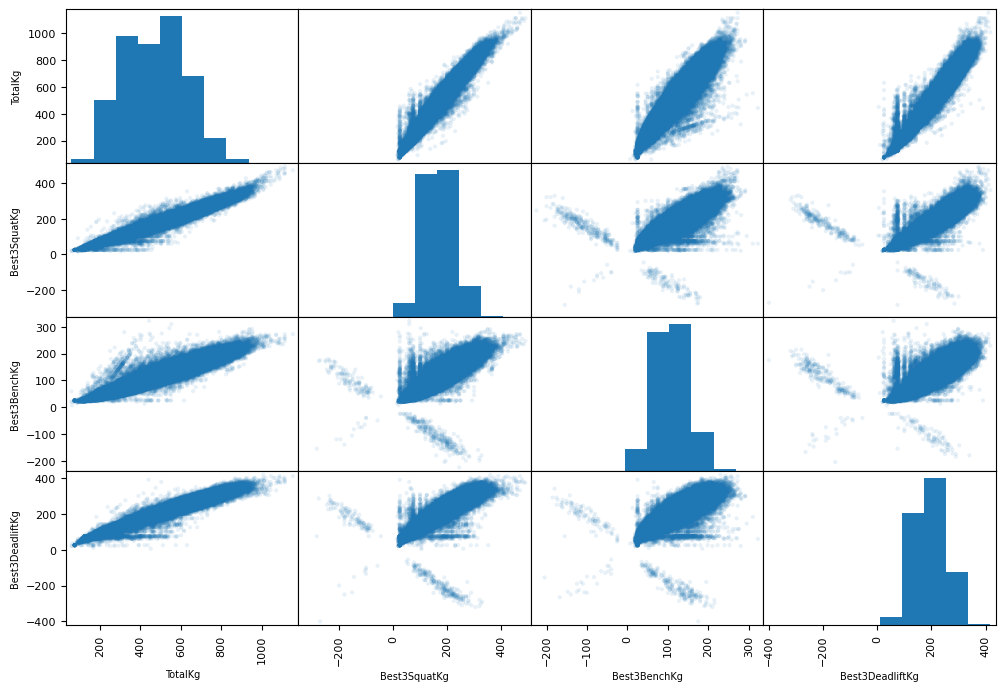

In [57]:
from pandas.plotting import scatter_matrix
attributes = ["TotalKg", "Best3SquatKg", "Best3BenchKg",
"Best3DeadliftKg"]
scatter_matrix(df[attributes], figsize=(12, 8), alpha=0.1)
plt.show()

## Pre-processor

In [11]:
df = pd.read_csv("../data/1-raw/openpowerlifting-2025-09-27-IPF.csv")

print(df.columns)
df.shape[:]

/var/folders/wm/mz0f2pm95tn34tffq_n21nv80000gn/T/ipykernel_56803/3191582298.py:1: DtypeWarning: Columns (33,38) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/1-raw/openpowerlifting-2025-09-27-IPF.csv")


Index(['Name', 'Sex', 'Event', 'Equipment', 'Age', 'AgeClass',
       'BirthYearClass', 'Division', 'BodyweightKg', 'WeightClassKg',
       'Squat1Kg', 'Squat2Kg', 'Squat3Kg', 'Squat4Kg', 'Best3SquatKg',
       'Bench1Kg', 'Bench2Kg', 'Bench3Kg', 'Bench4Kg', 'Best3BenchKg',
       'Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg', 'Deadlift4Kg',
       'Best3DeadliftKg', 'TotalKg', 'Place', 'Dots', 'Wilks', 'Glossbrenner',
       'Goodlift', 'Tested', 'Country', 'State', 'Federation',
       'ParentFederation', 'Date', 'MeetCountry', 'MeetState', 'MeetTown',
       'MeetName', 'Sanctioned'],
      dtype='object')


(540696, 42)

In [ ]:
# Checking unique divisions to understand the data to only keep Open
print("Unique divisions in IPF Raw SBD:")
df['Division'].value_counts()

Unique divisions in IPF Raw SBD:


Division
Open            157022
MR-O             57626
Juniors          57169
FR-O             33715
Sub-Juniors      30064
                 ...  
Pre-Novice           1
Masters 50+          1
Master 70-74         1
Master 65-69         1
M-II                 1
Name: count, Length: 431, dtype: int64

## Drop duplicate entries

In [ ]:
prioritise_divisions = ['Sub-Juniors', 'Juniors', 'MR-Jr', 'FR-Jr',
                        'Masters 1', 'Masters 2', 'Masters 3', 'Masters 4', 'Masters 5'
                        ] 
duplicate_cols = ['Name', 'Date', 'BodyweightKg', 'TotalKg']

df['is_junior'] = df['Division'].isin(prioritise_divisions).astype(int)
df['prioritise'] = df['is_junior'].apply(lambda x: 1 if x == 1 else 2)

df_clean = df.sort_values('prioritise').drop_duplicates(
    subset=duplicate_cols,
    keep='first'
).drop(columns=['is_junior', 'prioritise'])

print(len(df))
print(len(df_clean))

"""
540696
520187"""

540696
520187


'\n540696\n520187'

## Cleaning Data

In [ ]:
'''
Event: only SBD
Equipment: Raw only
Age: drop empty fields
Division: Open only (catches all with '-O', excludes lowercase 'o' such as 'Juniors' or 'Over 40')
TotalKg: drop empty fields (no DQs)
Place: must be a number (no DQs)
Best3: ensure all 3 lifts are successful (no DQs)
'''

EVENT = 'SBD'
EQUIPMENT = 'Raw'
DIVISION = ['Open', 'MR-O', 'FR-O'] # not including Juniors, duplicated lifter data in Open divisions
PARENT_FED = 'IPF'

ESSENTIAL_COLUMNS = [
    'Name', 'Date', 'Sex', 'Age', 'BodyweightKg',
    'Best3SquatKg', 'Best3BenchKg', 'Best3DeadliftKg', 
    'TotalKg', 'Dots'
]

data = df[
    (df['Event'] == EVENT) & 
    (df['Equipment'] == EQUIPMENT) &
    (df['Age'].notna()) &
    (df['Division'].isin(DIVISION)) &
    (df['TotalKg'].notna()) &
    (df['Place'].str.isnumeric()) &
    (df['Best3SquatKg'].notna()) &
    (df['Best3BenchKg'].notna()) &
    (df['Best3DeadliftKg'].notna()) &
    (df['ParentFederation'] == PARENT_FED)
].copy()

data = data[ESSENTIAL_COLUMNS].copy()

# Convert to datetime and sort by lifter and date (important for time-based feature engineering like calculating progression)
data['Date'] = pd.to_datetime(data['Date'])
data = data.sort_values(['Name', 'Date']).reset_index(drop=True)

# data.to_csv('../data/2-preprocessed/cleanNotIPF.csv', index=False)

print(f"Original rows: {len(df)}")
print(f"Filtered rows: {len(data)}")
print(f"Unique lifters: {data['Name'].nunique()}")
print(f"Male: {len(data[data['Sex']=='M'])}, Female: {len(data[data['Sex']=='F'])}")



Original rows: 3673663
Filtered rows: 175646
Unique lifters: 90267
Male: 111615, Female: 64026
